In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")

<AxesSubplot:title={'center':'Average Annual Salary by Language'}, ylabel='Language'>

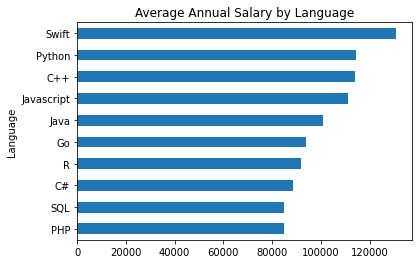

In [11]:
table = soup.find('table')

scraped_data = {'Language': [], 'Average Annual Salary': []}
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_average_salary = cols[3].getText()
    scraped_data['Language'].append(language_name)
    scraped_data['Average Annual Salary'].append(annual_average_salary)
    
scraped_data['Language'].remove('Language')
scraped_data['Average Annual Salary'].remove('Average Annual Salary')

df = pandas.DataFrame(data=scraped_data)
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$','')
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',','')
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)
df.sort_values(by=['Average Annual Salary'], inplace=True)

df.plot(kind='barh', x='Language', y='Average Annual Salary', 
        title='Average Annual Salary by Language', legend=False,
       )